### importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

### Load the dataset

In [2]:
# Load the dataset
data = pd.read_csv('../data/MachineLearningRating_v3.txt',  sep='|', low_memory=False)

### data inspection

In [3]:
# Display the first few rows
data.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
data.shape

(1000098, 52)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

### Check for missing values

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

### Handling missing values

### Drop Columns with Many Missing Values

In [7]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['CustomValueEstimate', 'CrossBorder', 'WrittenOff', 'Rebuilt', 'Converted', 'NumberOfVehiclesInFleet', 'Bank']
data_cleaned = data.drop(columns=columns_to_drop)

### Impute Missing Values for Categorical Columns

In [8]:
# Impute missing values with the mode for categorical columns
categorical_columns = ['AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model', 'Cylinders', 'bodytype', 'NumberOfDoors']
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

### Drop Rows with Minimal Missing Values

In [9]:
# Drop rows with missing values in columns with very few missing data
data_cleaned.dropna(subset=['CapitalOutstanding'], inplace=True)

### Impute Numeric Columns with Mean

In [10]:
# Impute missing values for numeric columns with the mean
numeric_columns = ['mmcode', 'cubiccapacity', 'kilowatts']
for column in numeric_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

### Review the Resulting Data

In [11]:
# Check again for missing values
data_cleaned.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate               552
AlarmImmobiliser    

### Exploratory Data Analysis (EDA)

### Basic Statistics for Numerical and Categorical Columns

In [12]:
# Basic statistics for numerical columns
numerical_summary = data_cleaned.describe()

# Basic statistics for categorical columns (frequency counts)
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns
categorical_summary = data_cleaned[categorical_columns].describe()

# Display the results
print("Numerical Summary:")
print(numerical_summary)

Numerical Summary:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000096e+06  1.000096e+06  1.000096e+06  1.000096e+06   
mean          1.048174e+05  7.956667e+03  3.020591e+03  5.487769e+07   
std           6.329368e+04  5.290033e+03  2.649849e+03  1.360006e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000096e+06  1.000096e+06   1.000096e+06  1.000096e+06   
mean       2.010225e+03  4.046617e+00   2.466743e+03  9.720796e+01   
std        3.261367e+00  2.939413e-01   4.426788e+02  1.938790e+01   
min        1.987000e+03  0.000000e+00   0.000000e+00

In [13]:
print("\nCategorical Summary:")
print(categorical_summary)


Categorical Summary:
           TransactionMonth Citizenship   LegalType    Title Language  \
count               1000096     1000096     1000096  1000096  1000096   
unique                   23           4           6        5        1   
top     2015-08-01 00:00:00              Individual       Mr  English   
freq                 106747      895208      911927   933554  1000096   

            AccountType  MaritalStatus         Gender       Country Province  \
count           1000096        1000096        1000096       1000096  1000096   
unique                3              3              3             1        9   
top     Current account  Not specified  Not specified  South Africa  Gauteng   
freq             638168         994465         950524       1000096   393865   

        ...          NewVehicle TermFrequency ExcessSelected  \
count   ...              846801       1000096        1000096   
unique  ...                   2             2             13   
top     ...  More t

### Univariate Analysis - Numerical Variables

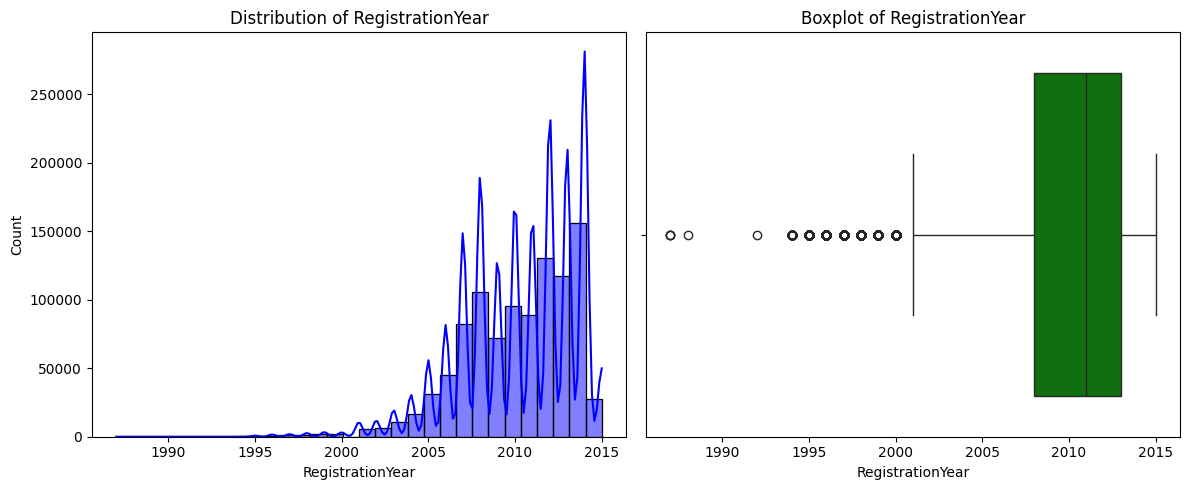

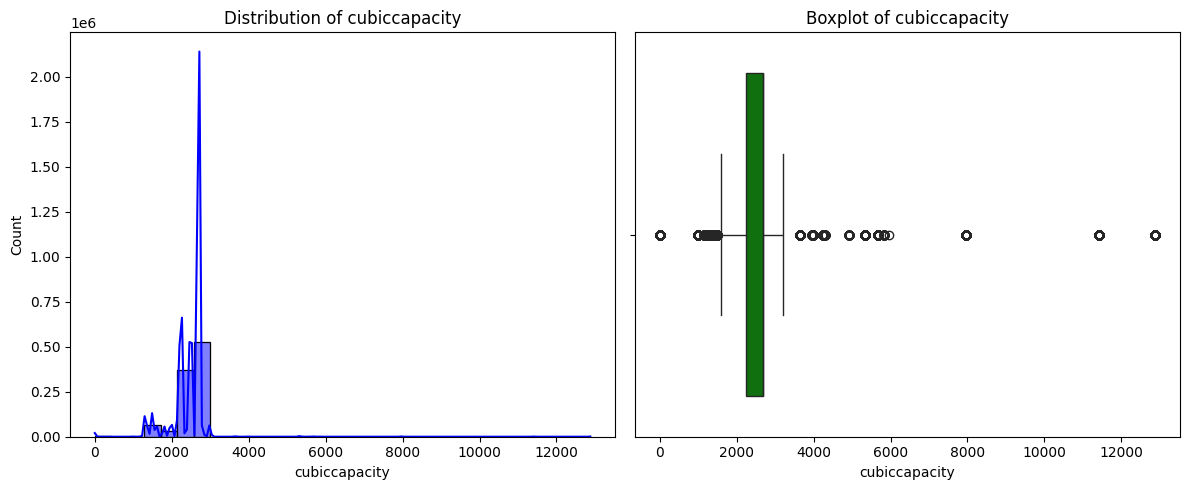

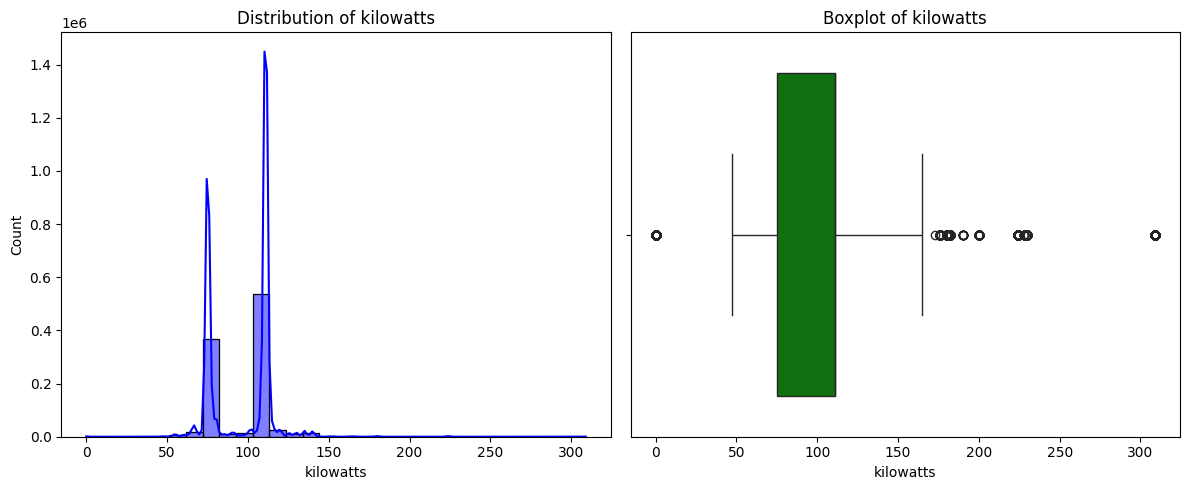

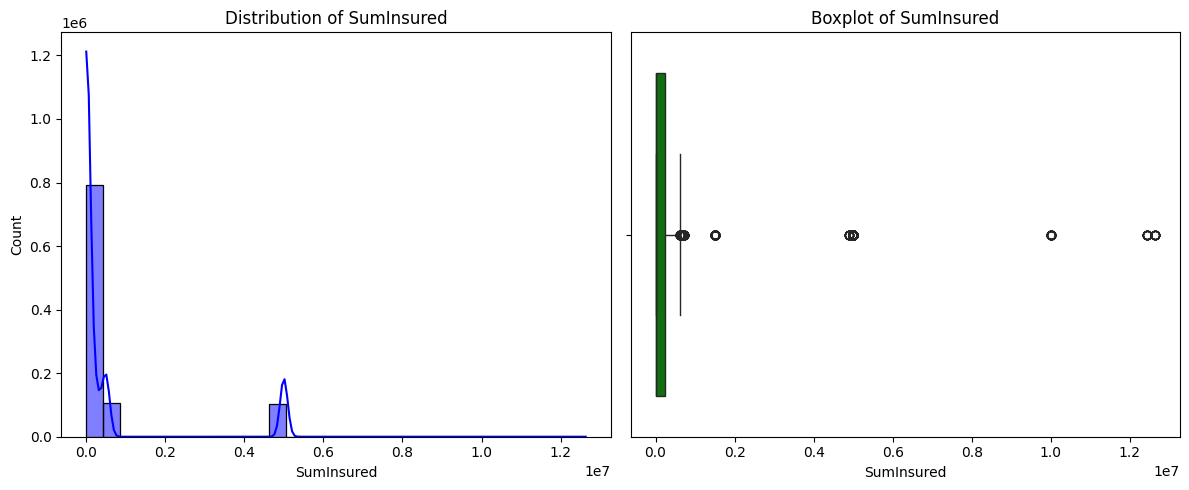

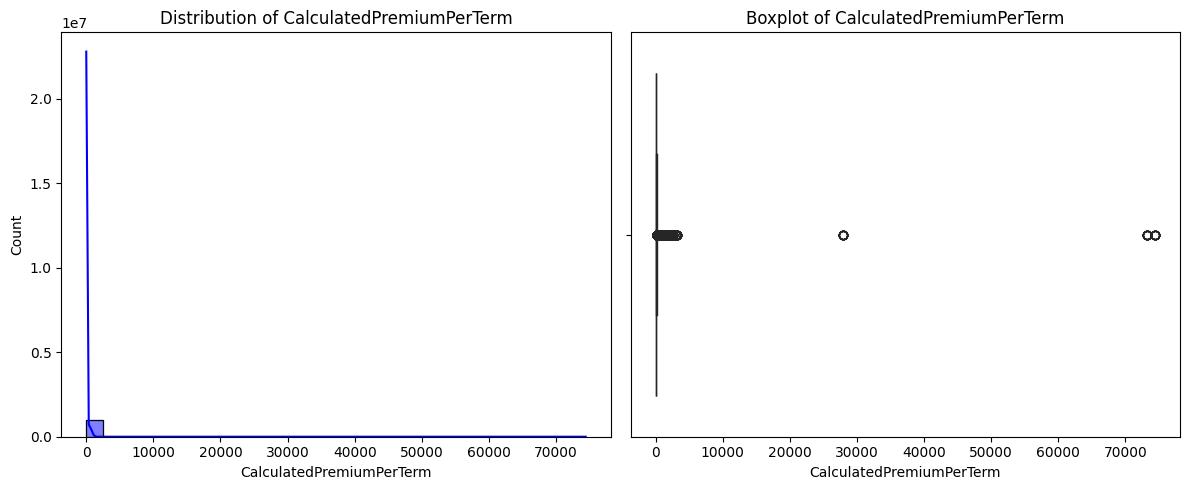

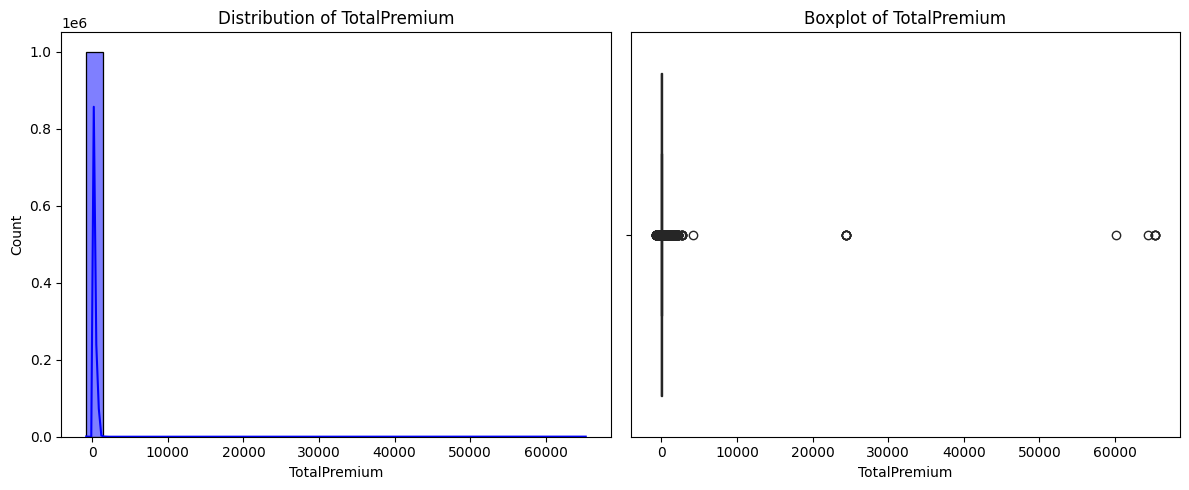

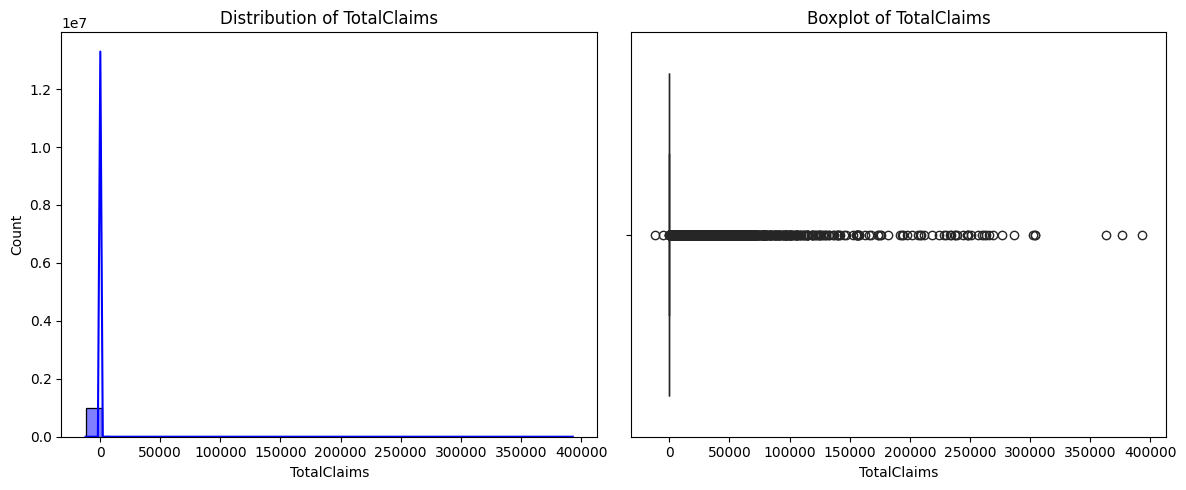

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns
numerical_columns = ['RegistrationYear', 'cubiccapacity', 'kilowatts', 
                     'SumInsured', 'CalculatedPremiumPerTerm', 
                     'TotalPremium', 'TotalClaims']

# Plot histograms and box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_cleaned[column], color='green')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

### Univariate Analysis - Categorical Variables

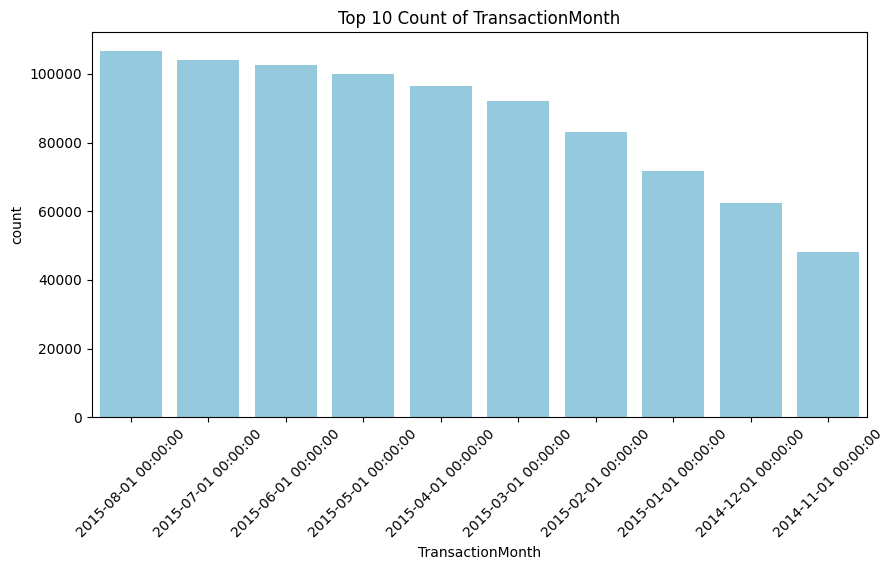

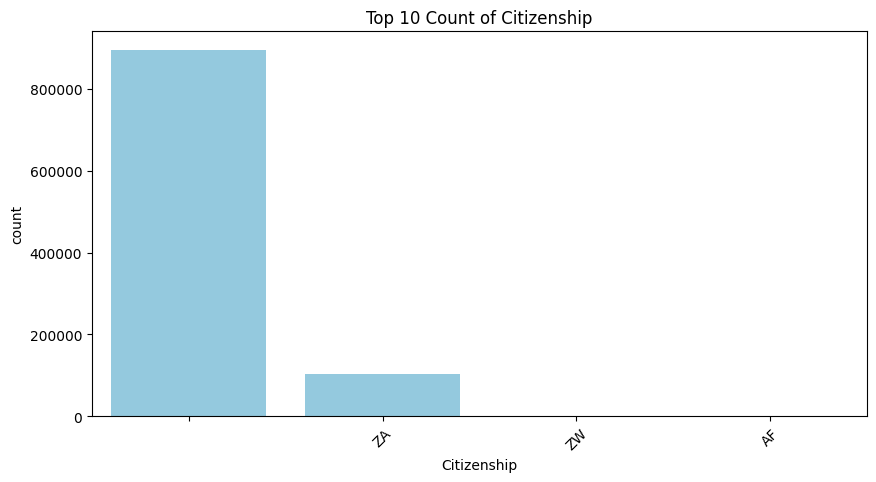

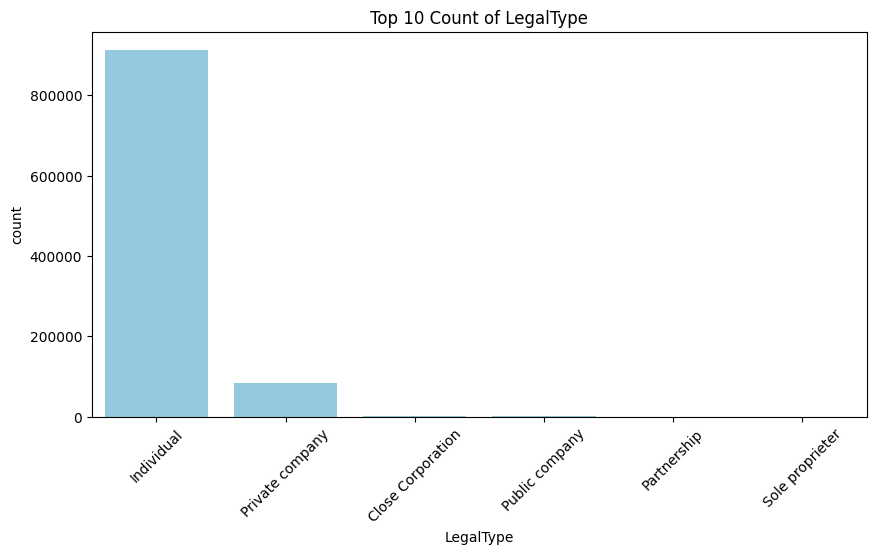

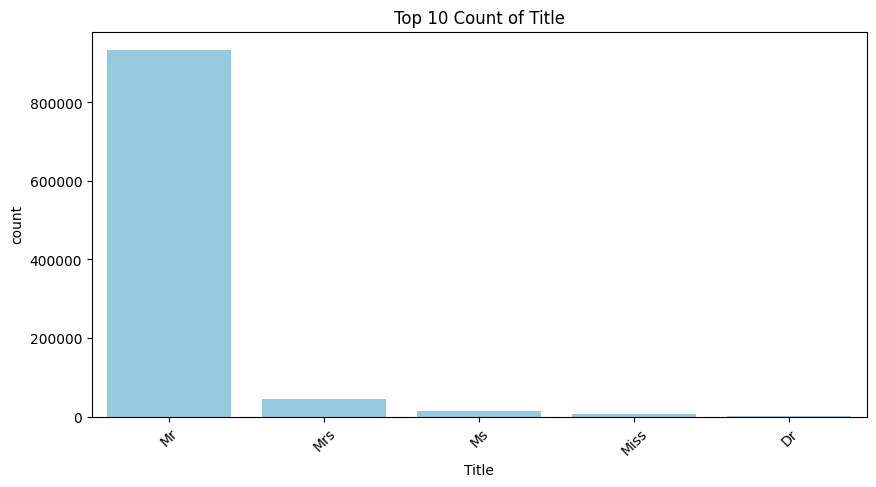

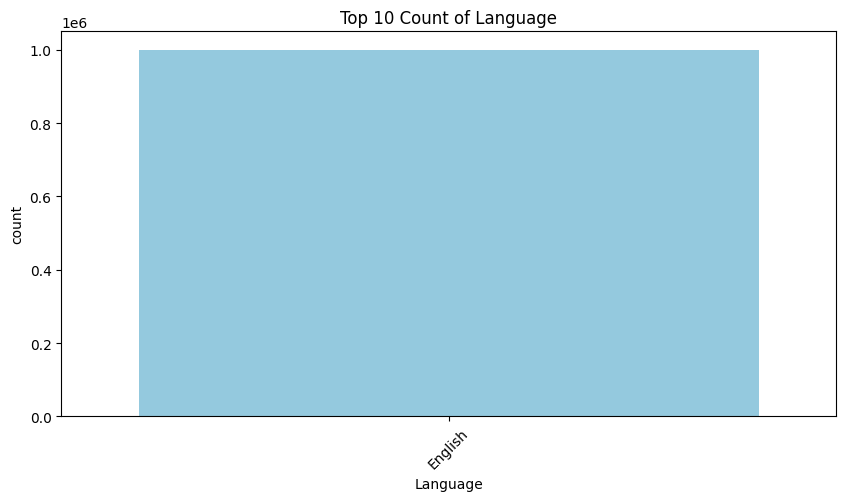

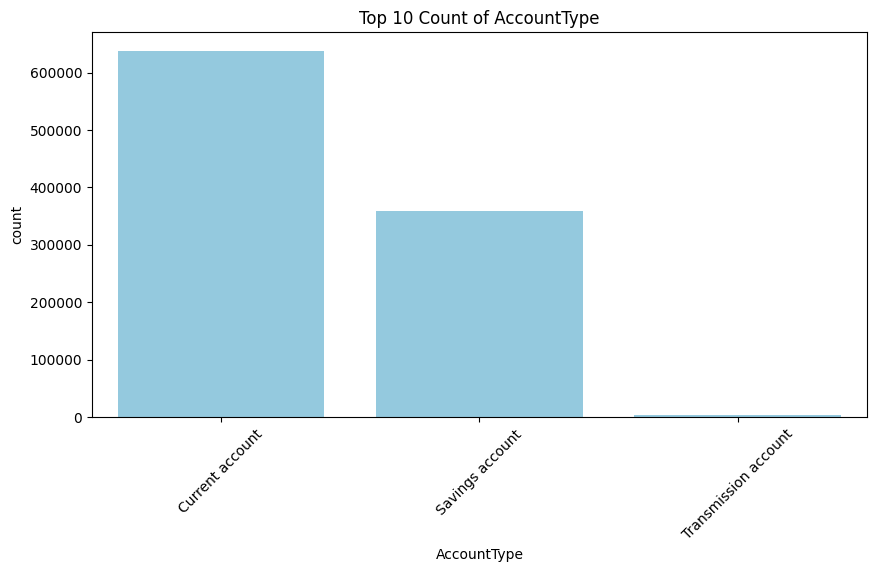

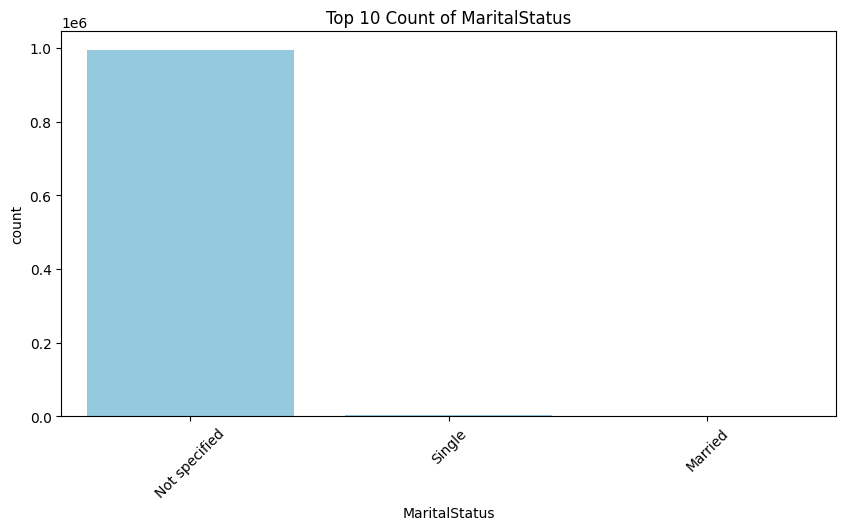

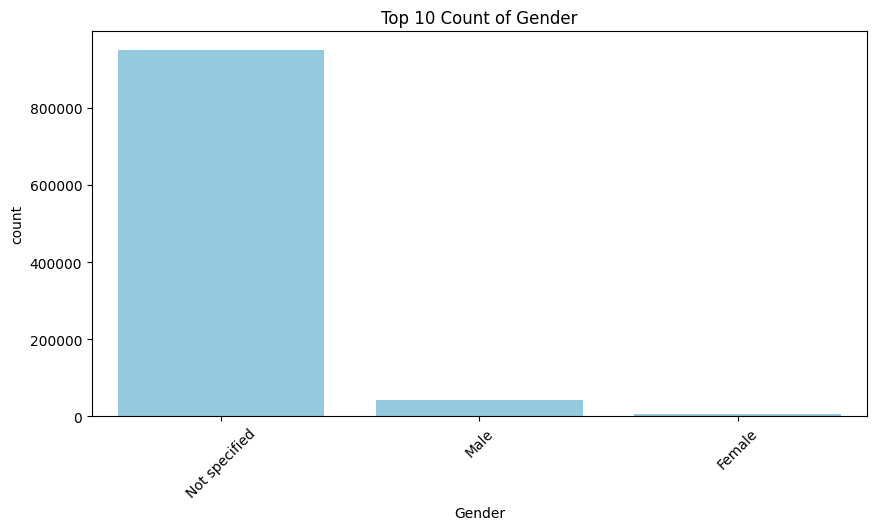

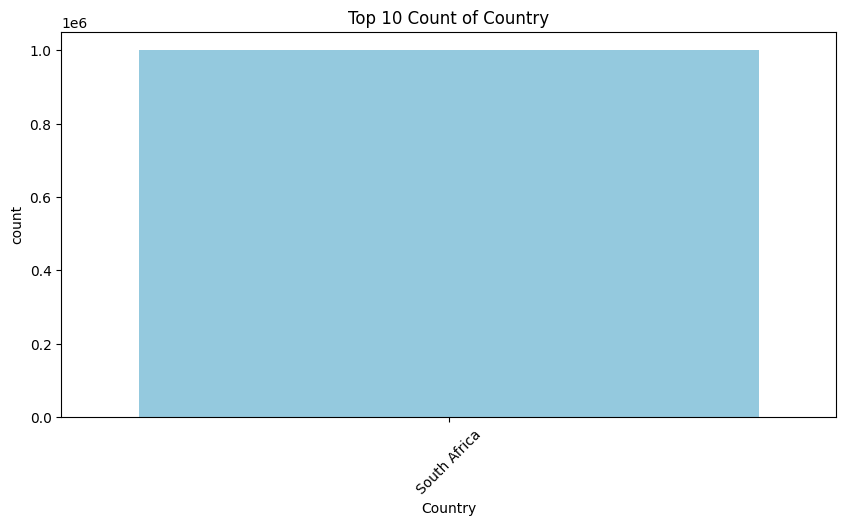

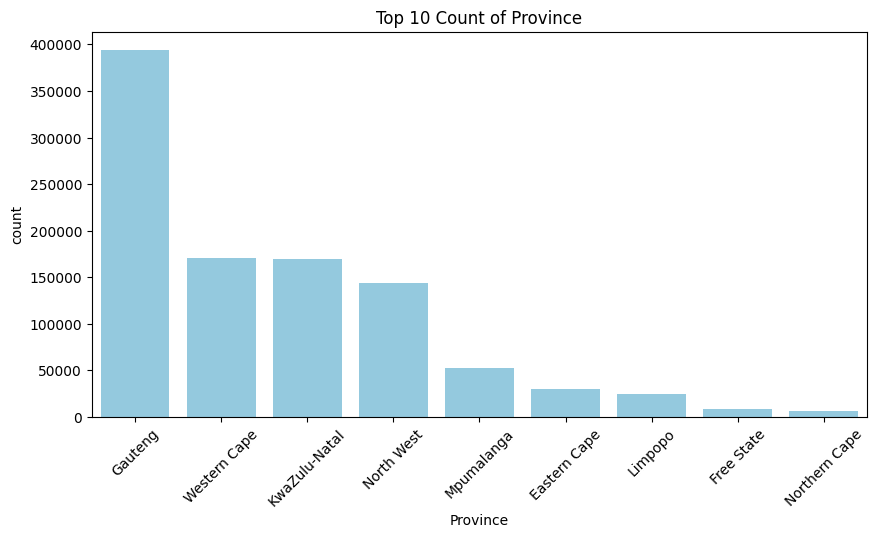

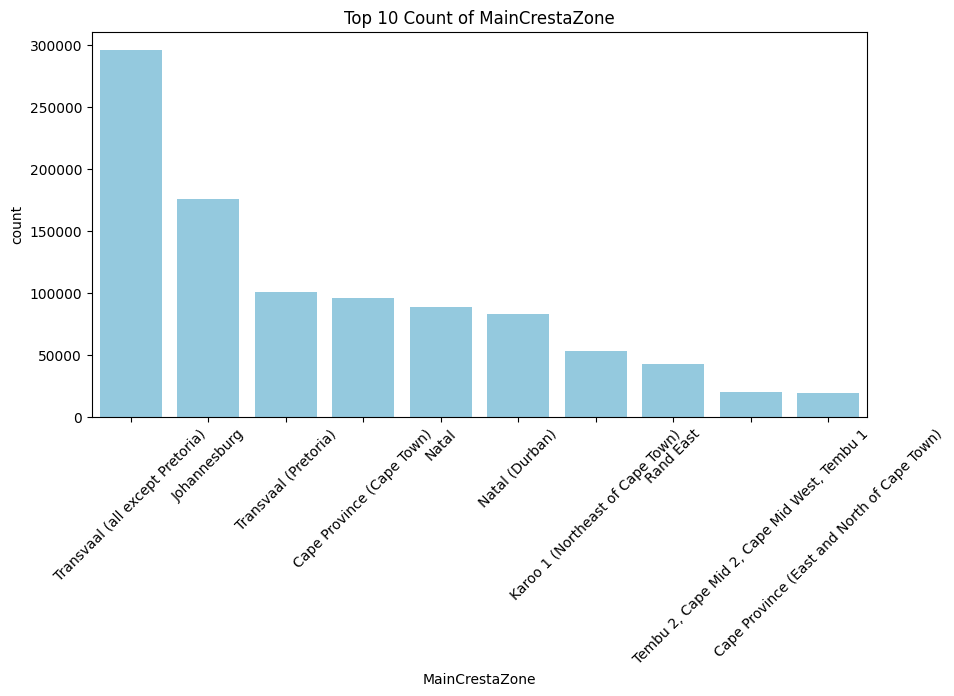

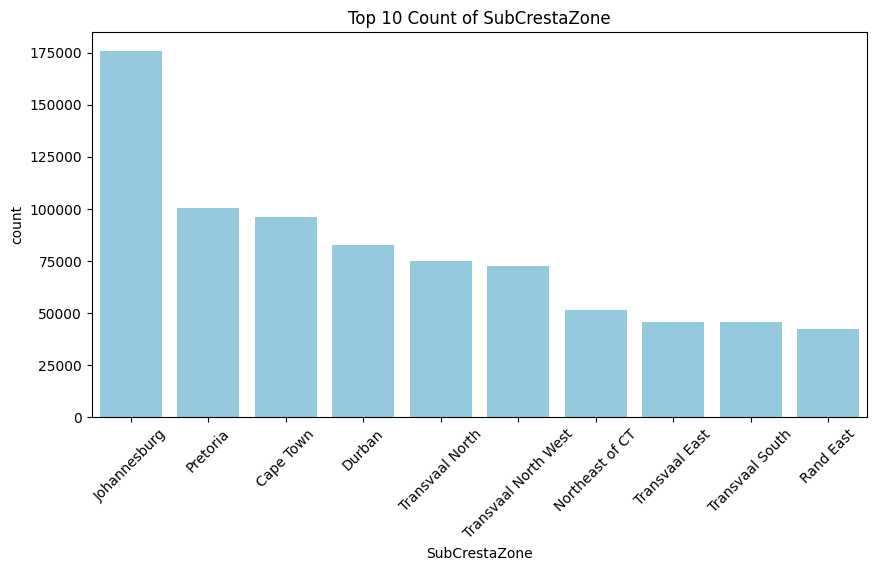

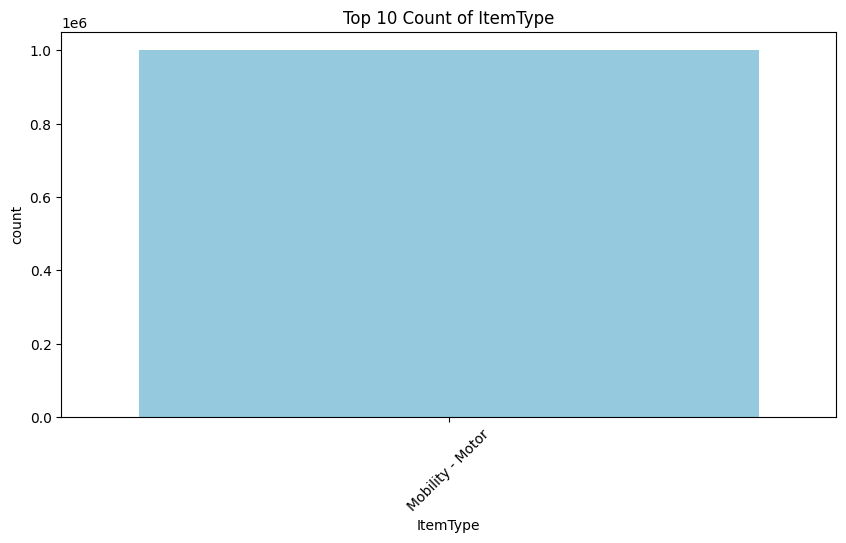

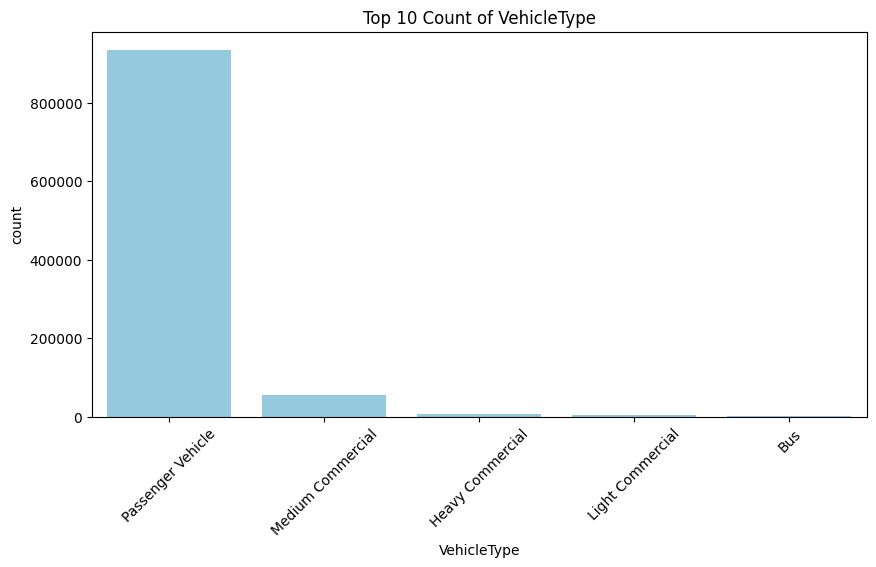

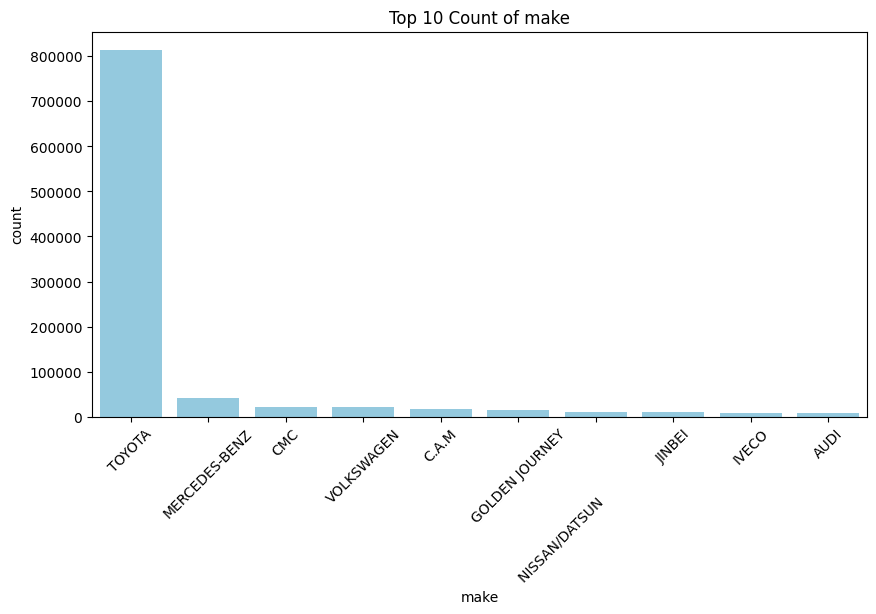

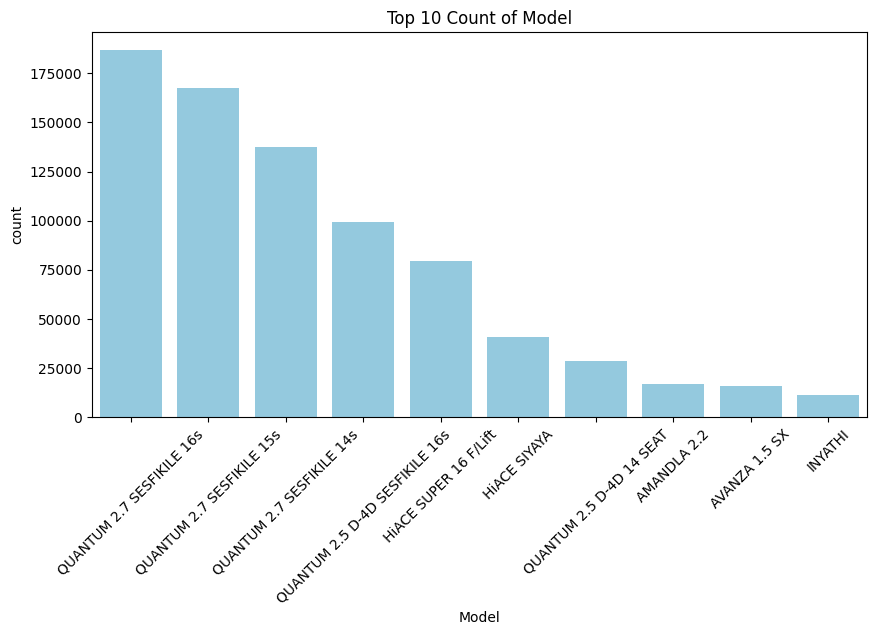

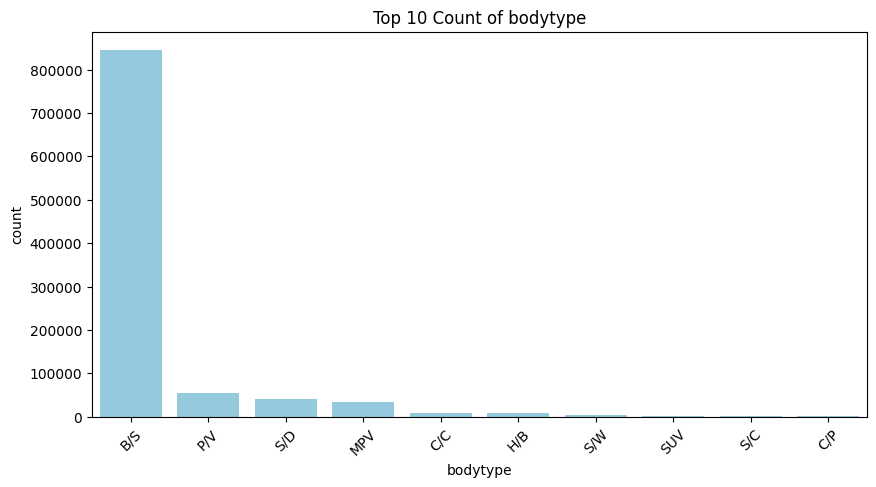

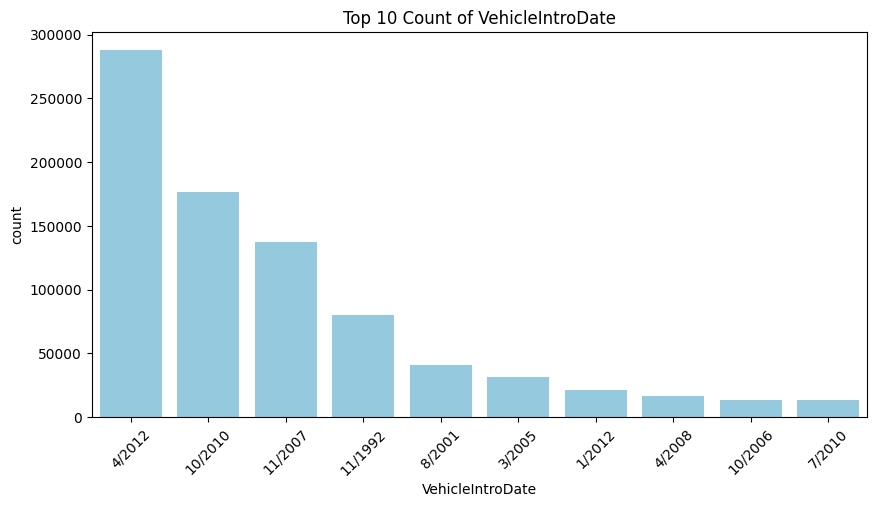

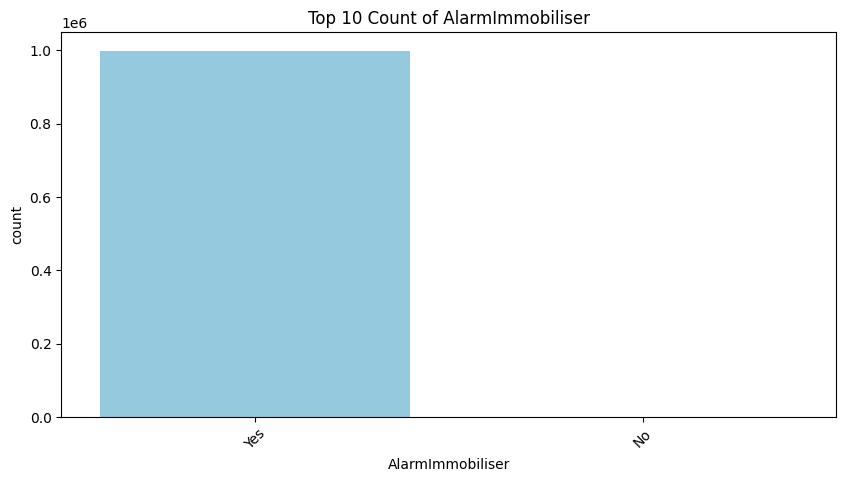

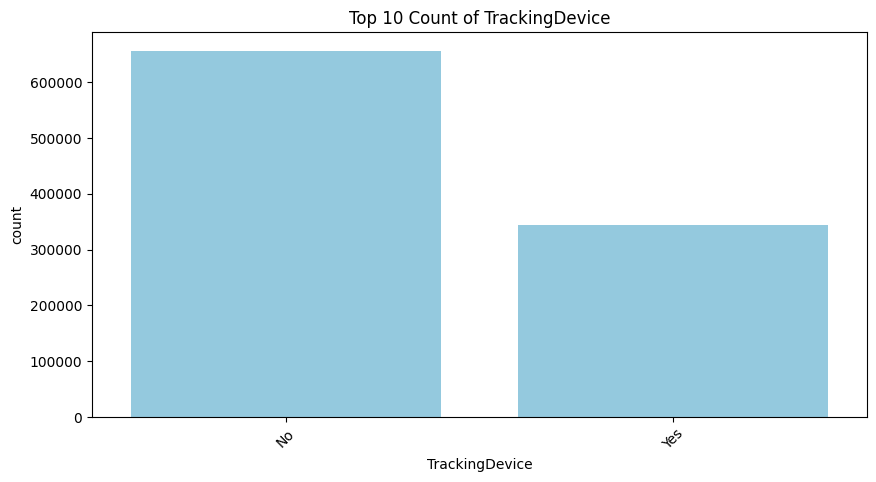

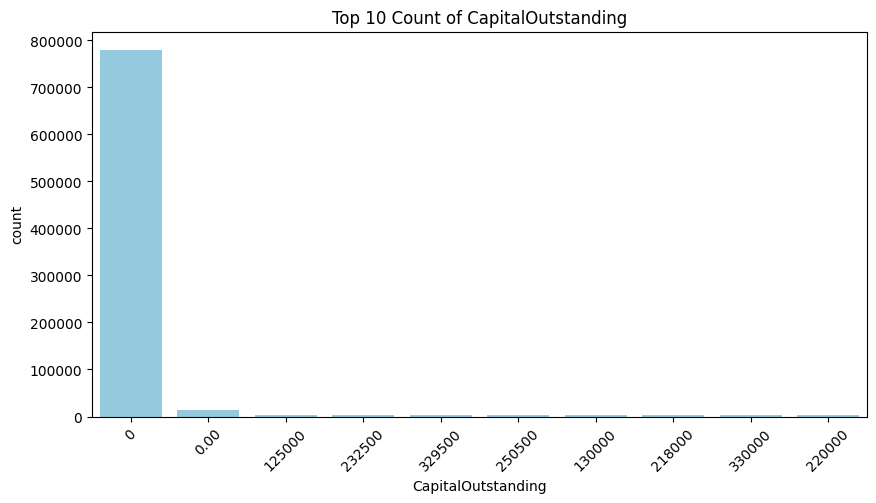

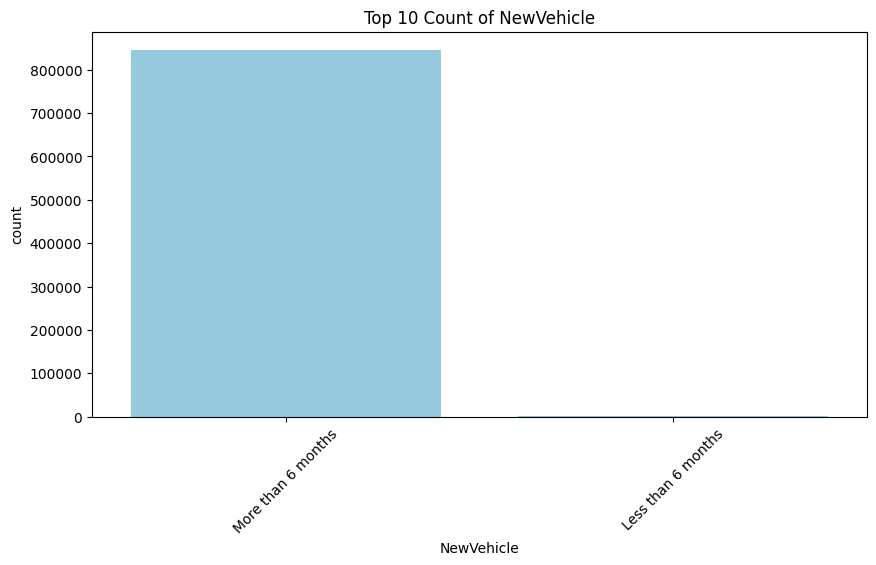

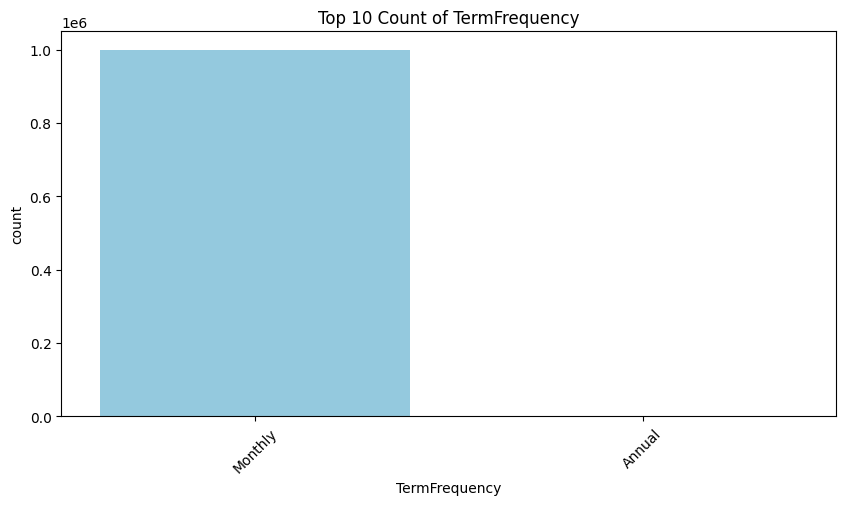

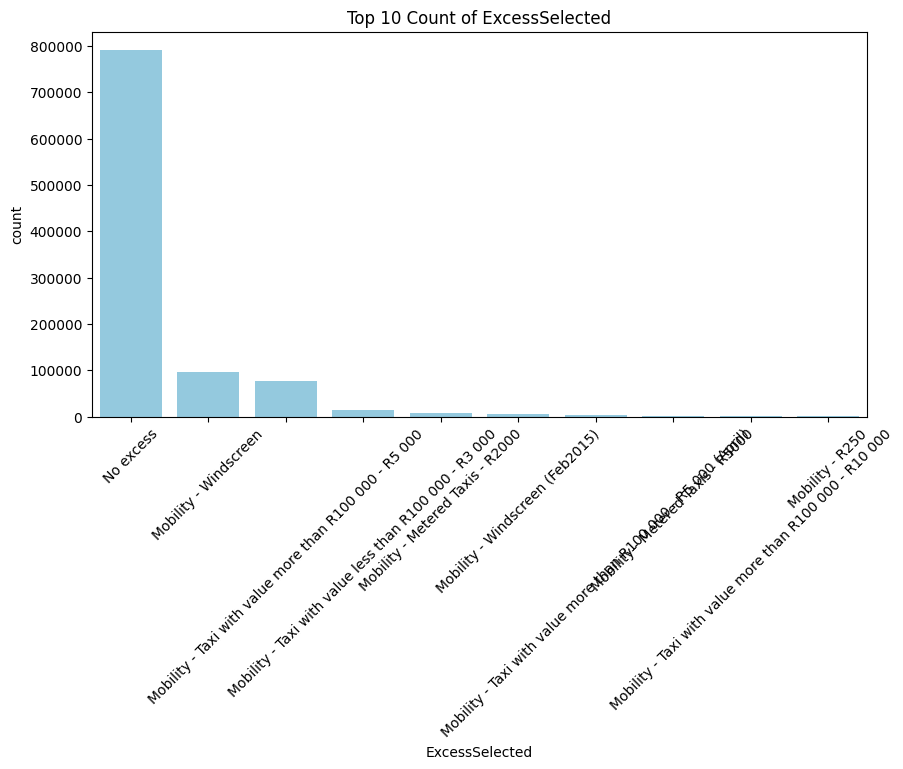

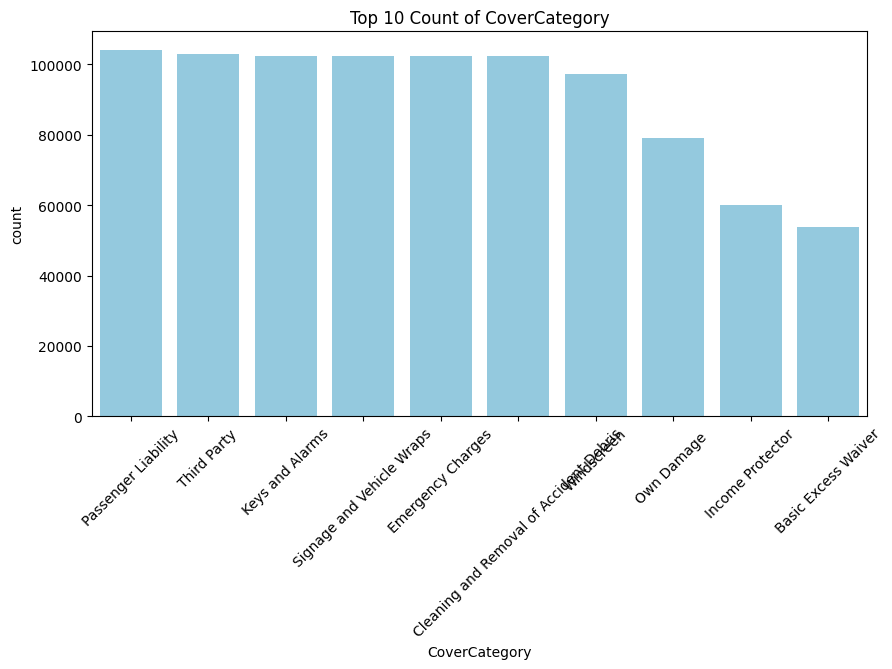

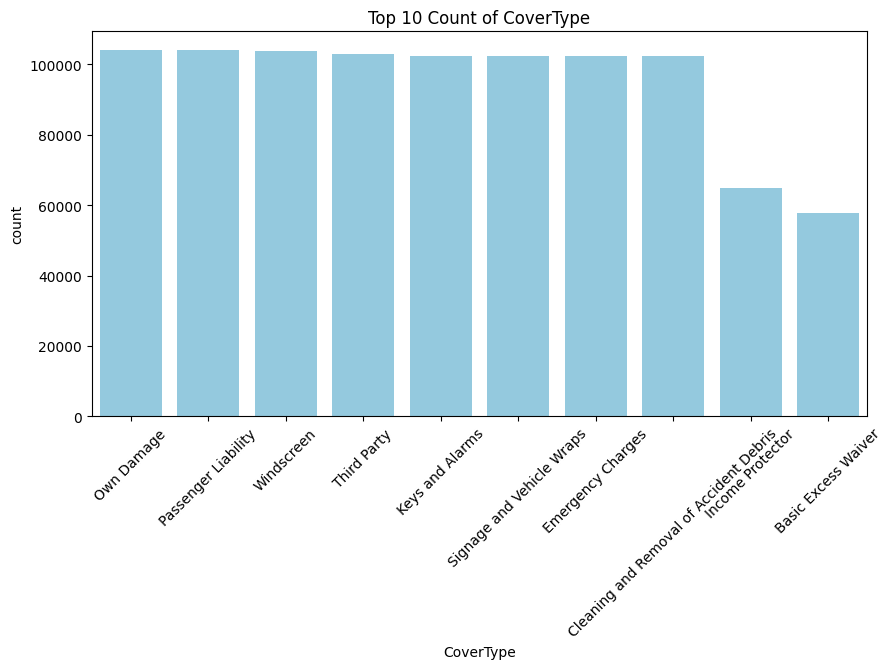

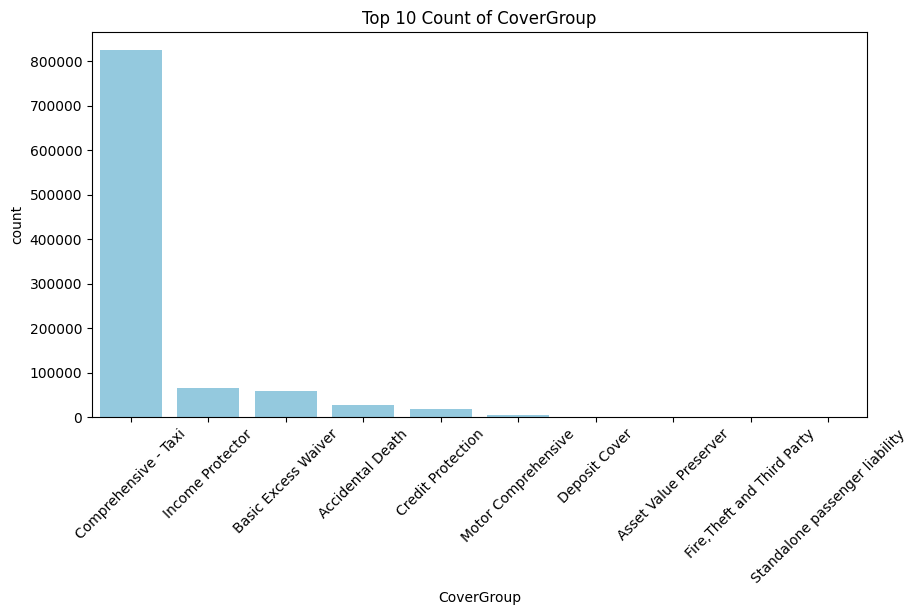

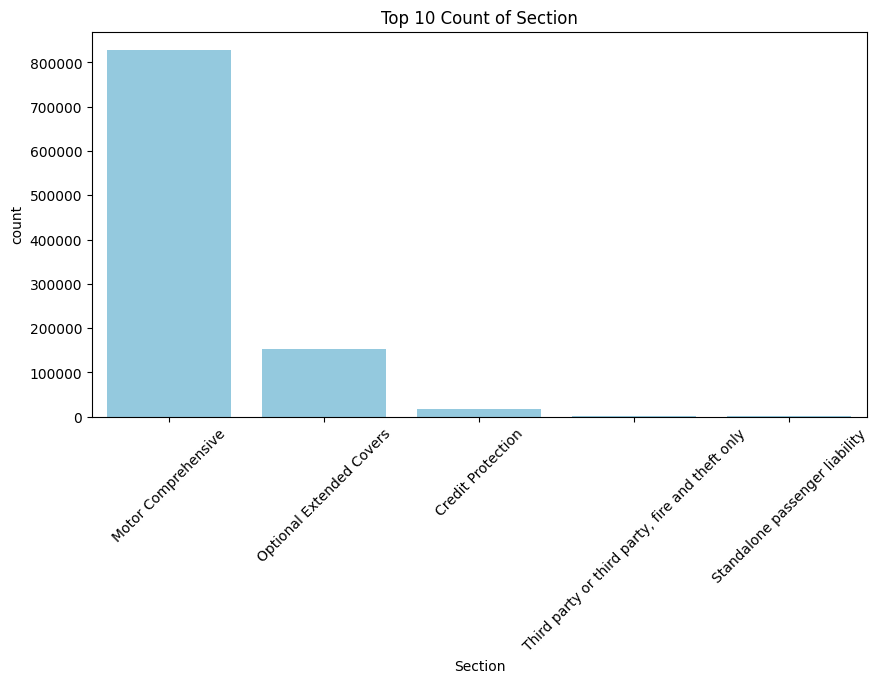

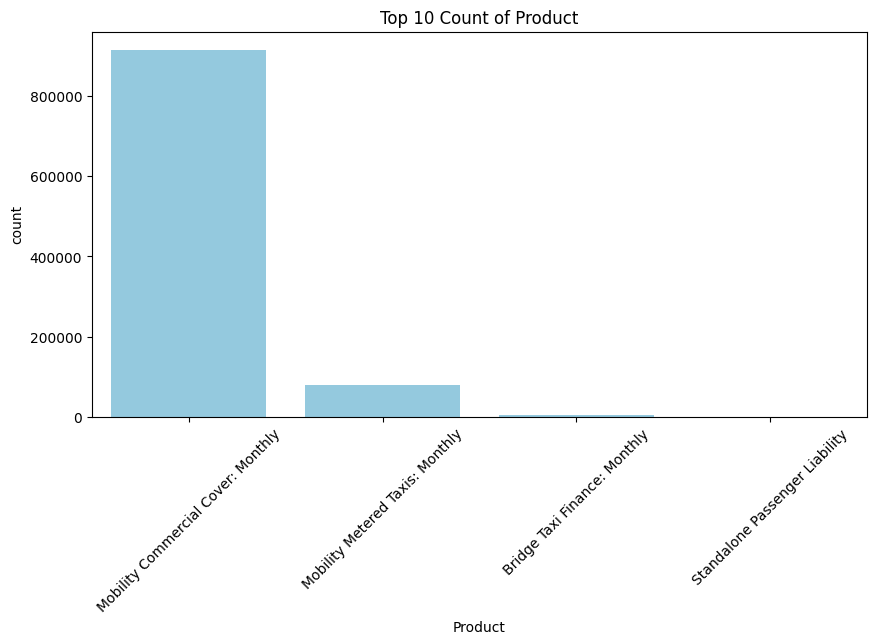

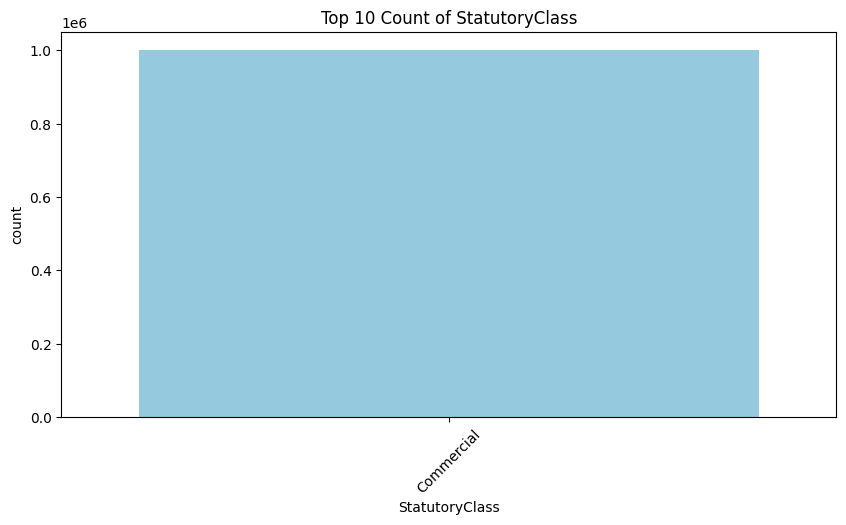

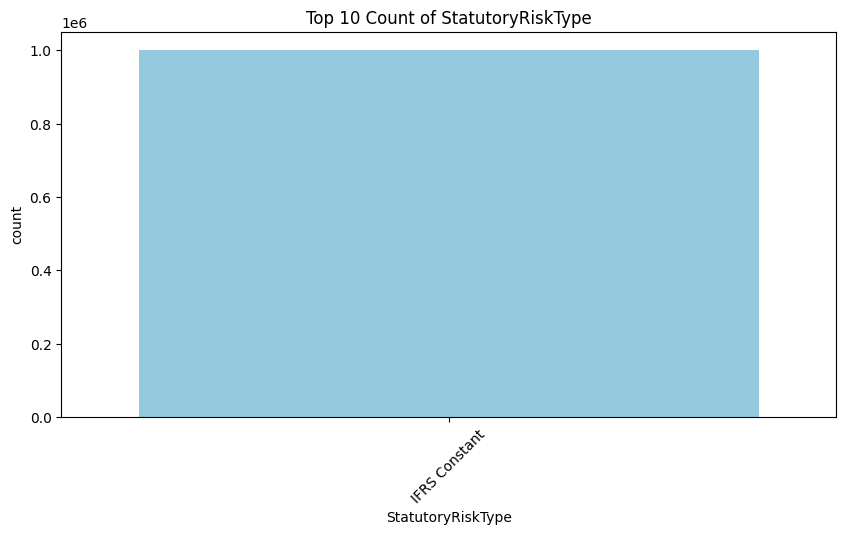

In [15]:
# Plot bar charts for categorical columns with top 10 high count values
for column in categorical_columns:
    # Get top 10 categories by count
    top_10_categories = data_cleaned[column].value_counts().nlargest(10).index
    # Filter the data to only include rows with the top 10 categories
    filtered_data = data_cleaned[data_cleaned[column].isin(top_10_categories)]
    
    plt.figure(figsize=(10, 5))
    sns.countplot(data=filtered_data, x=column, color='skyblue', order=top_10_categories)
    plt.title(f'Top 10 Count of {column}')
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

#### Numerical vs. Numerical

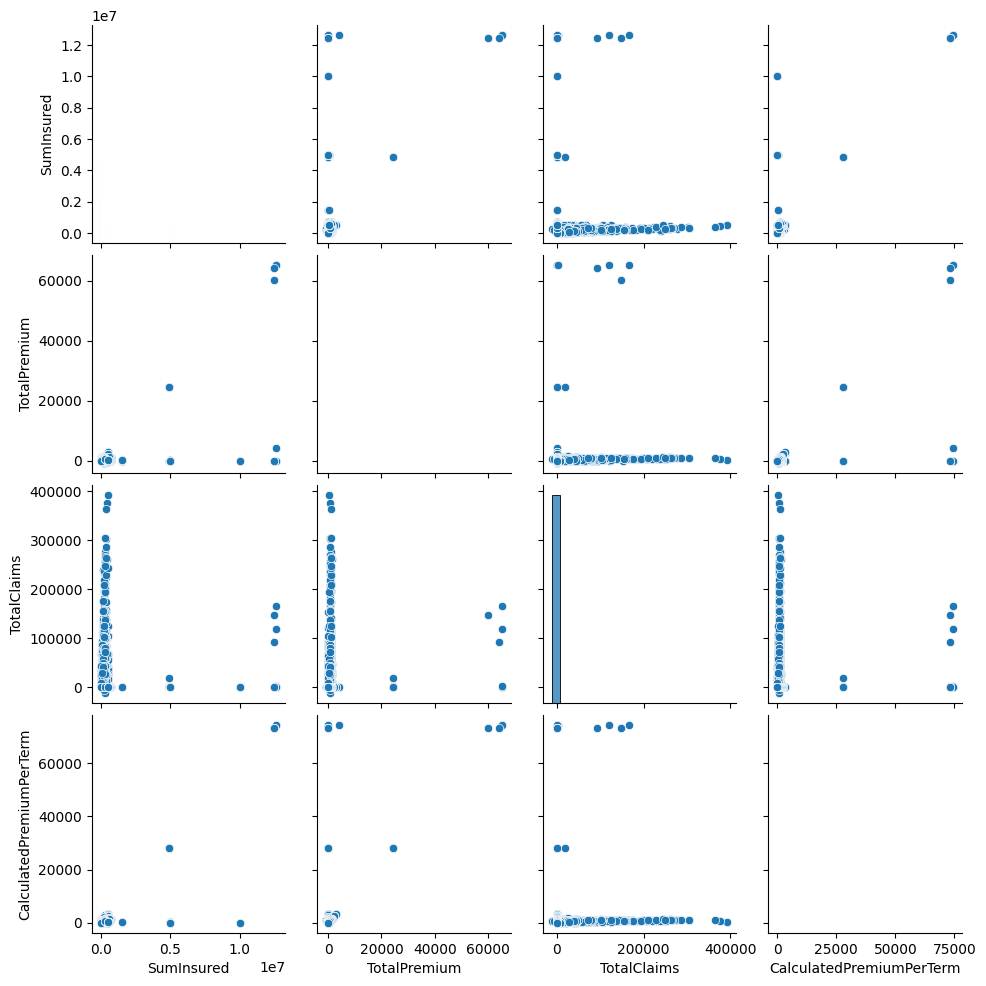

In [16]:
# Scatter plot between numerical variables
def plot_scatter_matrix(df, columns):
    sns.pairplot(df[columns])
    plt.show()

# Selecting a subset of numerical columns for demonstration
numeric_cols = ['SumInsured', 'TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm']
plot_scatter_matrix(data_cleaned, numeric_cols)


### Categorical vs. Numerical

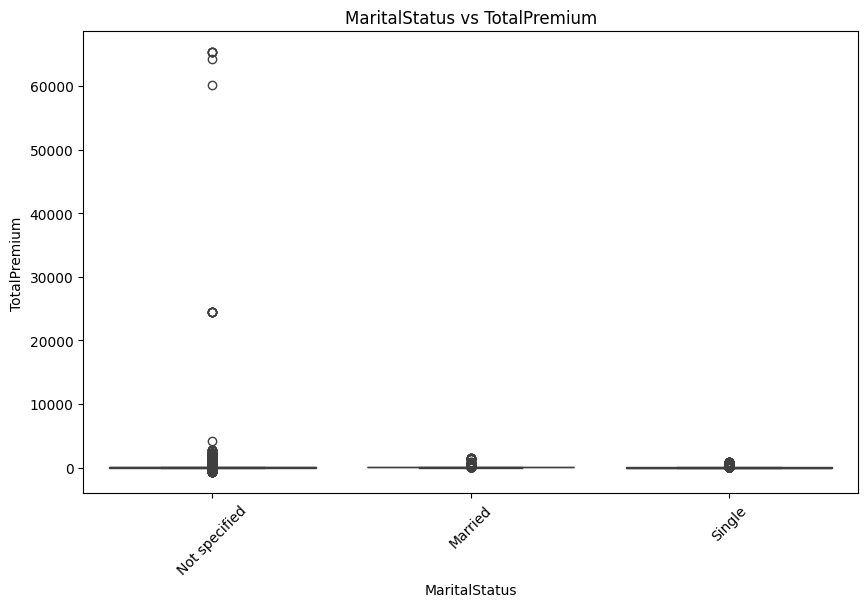

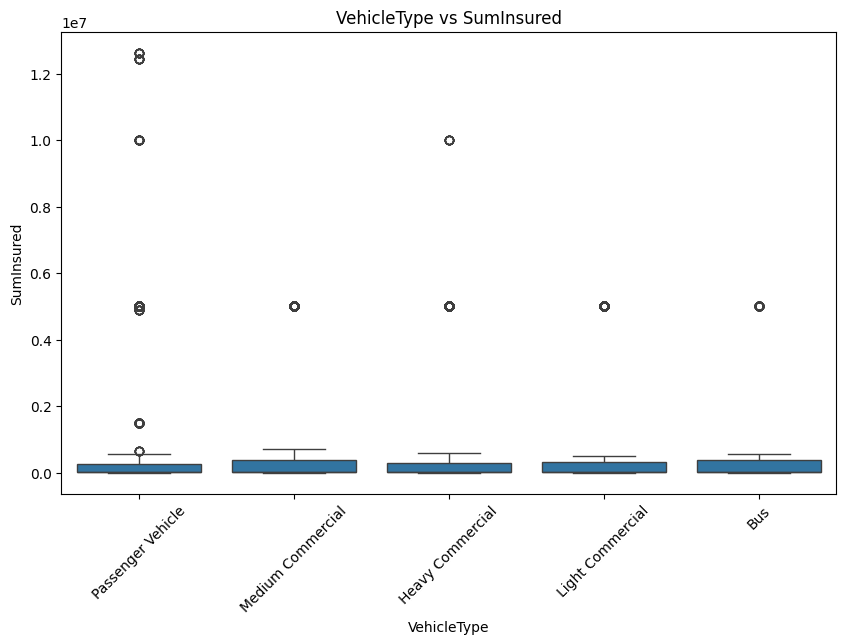

In [17]:
# Boxplot for categorical vs. numerical variables
def plot_categorical_numerical(df, categorical_col, numerical_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col)
    plt.title(f'{categorical_col} vs {numerical_col}')
    plt.xticks(rotation=45)
    plt.show()

# MaritalStatus vs TotalPremium
plot_categorical_numerical(data_cleaned, 'MaritalStatus', 'TotalPremium')

# VehicleType vs SumInsured
plot_categorical_numerical(data_cleaned, 'VehicleType', 'SumInsured')


### Categorical vs. Categorical

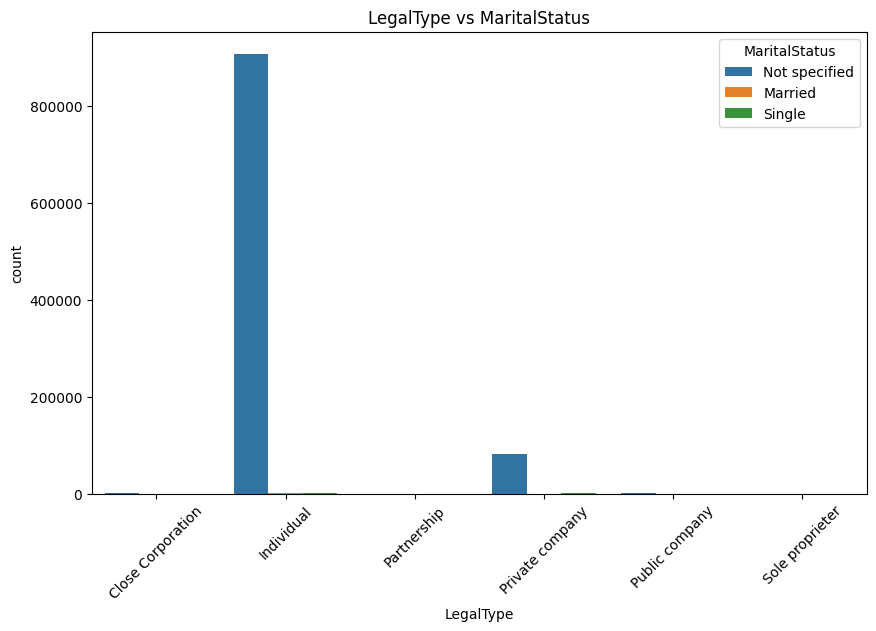

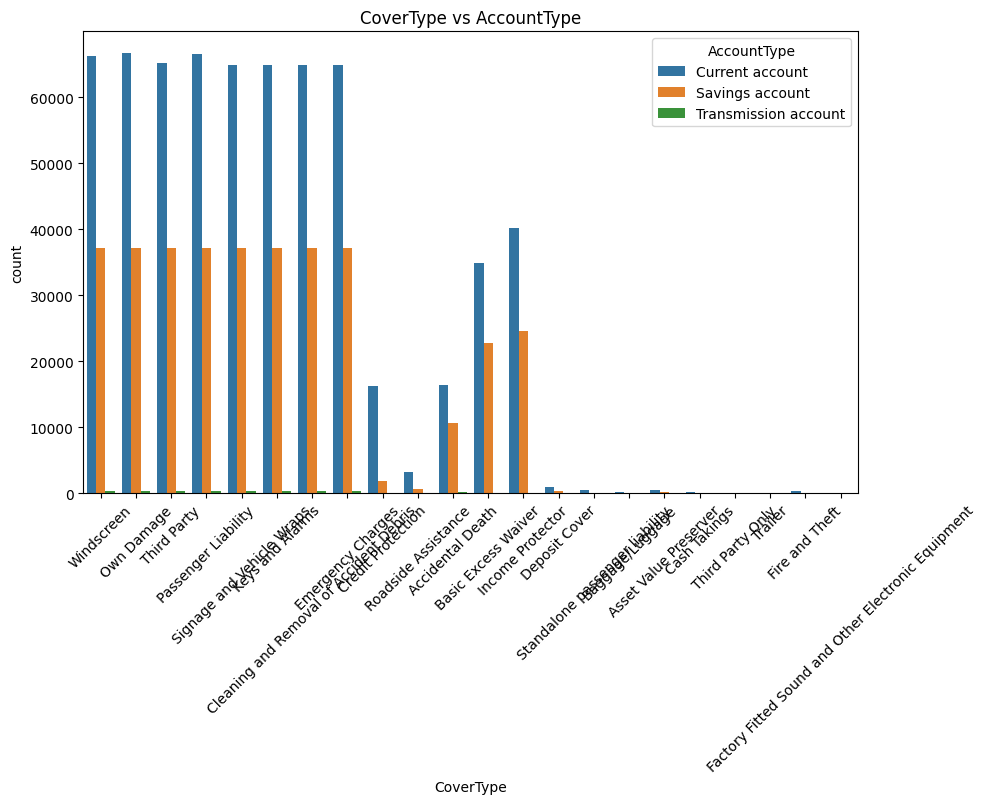

In [18]:
# Count plot for two categorical variables
def plot_categorical_vs_categorical(df, cat1, cat2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat1, hue=cat2)
    plt.title(f'{cat1} vs {cat2}')
    plt.xticks(rotation=45)
    plt.show()

# LegalType vs MaritalStatus
plot_categorical_vs_categorical(data_cleaned, 'LegalType', 'MaritalStatus')

# CoverType vs AccountType
plot_categorical_vs_categorical(data_cleaned, 'CoverType', 'AccountType')

### Correlation Matrix (Heatmap)

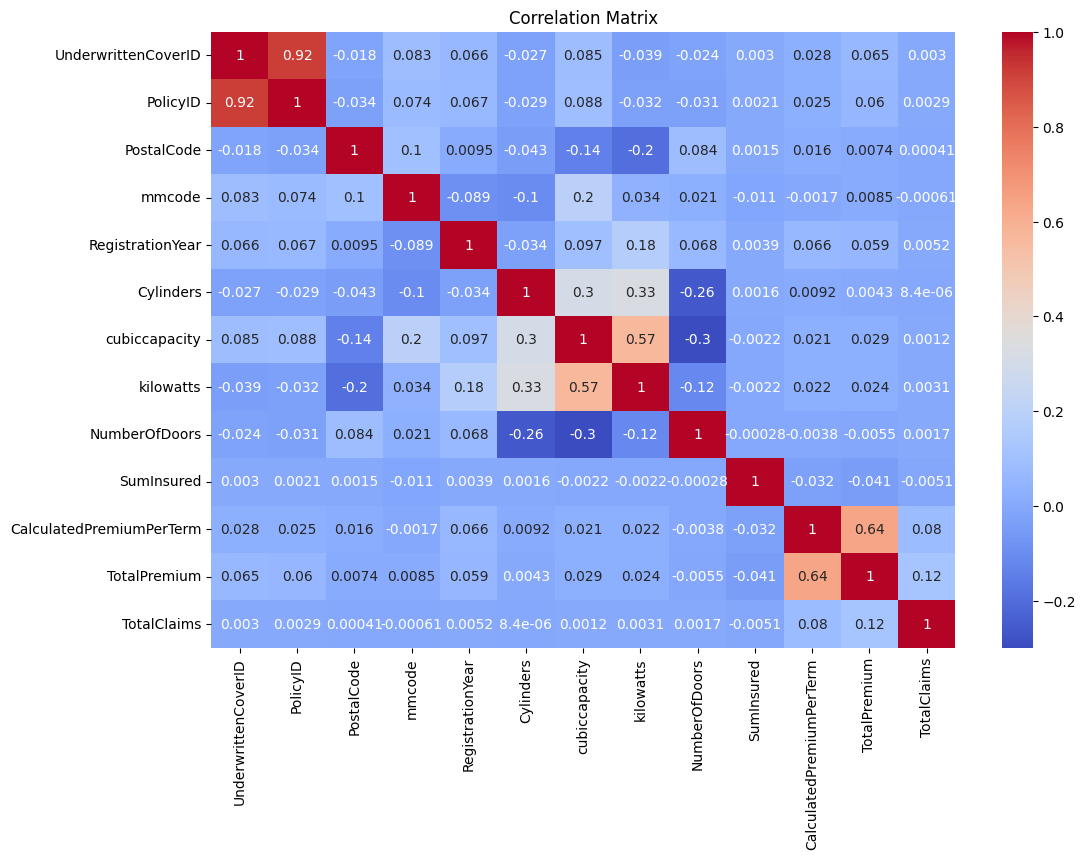

In [19]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### handling outliers

In [20]:
# IQR Method
def detect_outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Identify outliers
        column_outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        if not column_outliers.empty:
            outliers = pd.concat([outliers, column_outliers], axis=0)
        print(f'Outliers in {column} using IQR Method:')
        print(column_outliers[[column]].head())
    return outliers

In [21]:
# Detect outliers using IQR Method
outliers_iqr = detect_outliers_iqr(data_cleaned, numeric_columns)

Outliers in mmcode using IQR Method:
       mmcode
0  44069150.0
1  44069150.0
2  44069150.0
3  44069150.0
4  44069150.0
Outliers in cubiccapacity using IQR Method:
    cubiccapacity
12         4921.0
13         4921.0
14         4921.0
15         4921.0
16         4921.0
Outliers in kilowatts using IQR Method:
    kilowatts
12      230.0
13      230.0
14      230.0
15      230.0
16      230.0


In [22]:
# Visualizing Outliers with Box Plots
def visualize_outliers(df, columns):
    plt.figure(figsize=(16, len(columns) * 2.5))
    for i, column in enumerate(columns):
        plt.subplot(len(columns)//3 + 1, 3, i + 1)
        sns.boxplot(df[column])
        plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

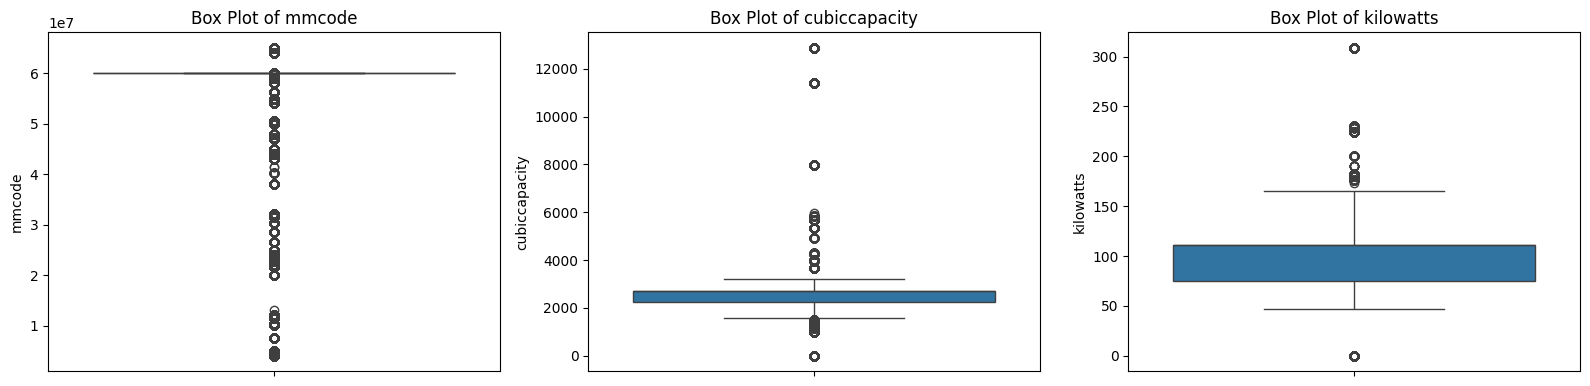

In [23]:
# Visualize Outliers using Box Plots
visualize_outliers(data_cleaned, numeric_columns)

   log_cubiccapacity  log_kilowatts  sqrt_mmcode
0           7.862497       4.875197  6638.459912
1           7.862497       4.875197  6638.459912
2           7.862497       4.875197  6638.459912
3           7.862497       4.875197  6638.459912
4           7.862497       4.875197  6638.459912


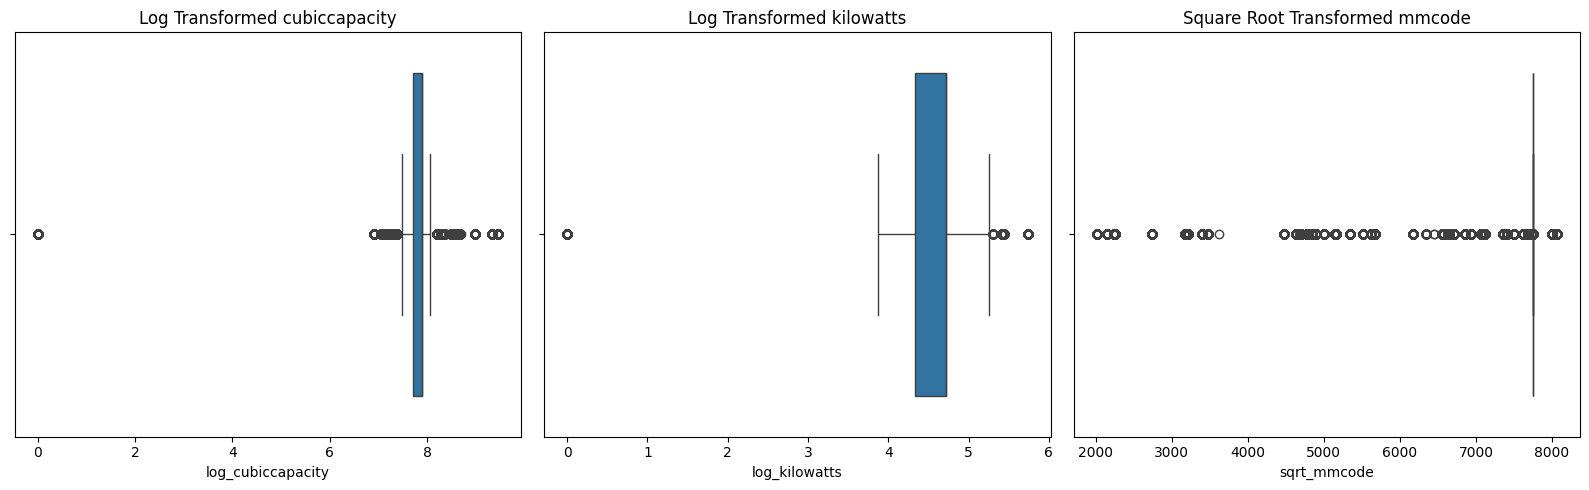

In [24]:
# Log transformation on 'cubiccapacity' and 'kilowatts'
data_cleaned['log_cubiccapacity'] = np.log1p(data_cleaned['cubiccapacity'])  # log1p applies log(x + 1)
data_cleaned['log_kilowatts'] = np.log1p(data_cleaned['kilowatts'])

# Square root transformation on 'mmcode'
data_cleaned['sqrt_mmcode'] = np.sqrt(data_cleaned['mmcode'])

# Check the new transformed data
print(data_cleaned[['log_cubiccapacity', 'log_kilowatts', 'sqrt_mmcode']].head())

# You can visualize the transformed columns to check for improvement
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data_cleaned, x='log_cubiccapacity')
plt.title('Log Transformed cubiccapacity')

plt.subplot(1, 3, 2)
sns.boxplot(data=data_cleaned, x='log_kilowatts')
plt.title('Log Transformed kilowatts')

plt.subplot(1, 3, 3)
sns.boxplot(data=data_cleaned, x='sqrt_mmcode')
plt.title('Square Root Transformed mmcode')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Applying Standard Scaling (z-score normalization)
scaler = StandardScaler()
data_cleaned[['scaled_log_cubiccapacity', 'scaled_log_kilowatts', 'scaled_sqrt_mmcode']] = scaler.fit_transform(data_cleaned[['log_cubiccapacity', 'log_kilowatts', 'sqrt_mmcode']])
